# Devoir / Examen : Module manipulation de données avec Pandas 


#### Il y a 14 petites manipulations demandées dans cet exercice. Vous serez evalués sur votre capacité à reproduire les resultats attendus (si vous proposez des resultats enjolivés, vous obtiendrez des points bonus)



Nous revenons à notre ensemble de données sur la piste cyclable ici. Je suis curieux de savoir si Montreal est une ville de velo banlieue ou une ville de cyclisme ludique - les gens font-ils plus de vélo les week-ends ou les jours de semaine?

In [5]:
# Rends nos tracés inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Enjolive les graphes
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

### Ajouter une colonne 'jour de la semaine' à notre dataframe 

-1-

Premièrement, nous devons charger les données, avec time index, ... Nous l'avons déjà fait auparavant (cf notebook précédent).
Ensuite, nous allons simplement regarder la piste cyclable Berri.

nb: utiliser les nombreux parametres de read_csv :
- changer le séparateur de colonne par "," (parametre "sep")
- Analyser les dates dans la colonne 'Date'
- Dites-lui que nos dates ont le jour en premier au lieu du mois en premier
- Définir l'index pour qu'elle soit la colonne 'Date'

In [ ]:
#TBD

df = pd.read_csv('comptagevelo2017.csv', sep=',', header=0, index_col='Date', parse_dates=True,dayfirst=True)
df.head()


,Unnamed: 1,Berri1,Boyer,Boyer 2,Brébeuf,Christophe-Colomb,CSC (Côte Sainte-Catherine),Eco-Totem - Métro Laurier,Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Pont Jacques-Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent/Bellechasse,Saint-Urbain
Date,,,,,,,,,,,,,,,,,,,,
2017-01-01,00:00,38,35,NaN,20,NaN,60,58,38,12,10,13,9,0.0,42,77,15,8,72,5
2017-01-02,00:00,109,40,0.0,43,NaN,61,66,152,57,9,52,14,0.0,136,231,22,10,182,4
2017-01-03,00:00,141,24,24.0,9,NaN,14,131,216,74,32,71,17,0.0,99,242,53,28,532,5
2017-01-04,00:00,233,64,95.0,7,NaN,12,160,284,80,45,64,5,15.0,128,296,131,33,821,0
2017-01-05,00:00,265,93,94.0,11,NaN,14,160,306,97,38,97,6,0.0,189,338,89,45,786,9


Berri est une rue de Montréal avec une piste cyclable assez importante. Un ami l'utilise principalement pour se rendre à la bibliothèque, mais il l'utilisait parfois lorsque il travaillait dans le Vieux-Montréal.

Nous allons donc créer un tableau de données (ici un Series) contenant uniquement les chemins cyclables du quartier de Berri.

In [ ]:
# Petite copy() sinon nous ne retrouverons plus nos données initiales :)
berri_bikes=df['Berri1'].copy()


Ensuite, nous devons ajouter une colonne "jour de la semaine". Tout d'abord, nous pouvons obtenir le jour de la semaine à partir de l'index. Nous n'avons pas encore beaucoup parlé d'index, mais l'index est ce qui se trouve à gauche du cadre de données ci-dessus, sous «Date». Ici, ce sont tous les jours de l'année.

In [ ]:
berri_bikes.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [ ]:
# Pas mal ça aussi, merci pandas
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Date', length=365)

In [ ]:
# Encore mieux !
# Ce sont les jours de la semaine, où 0 est le lundi. 
# Vous pouvez le verifier sur un calendrier 
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
           dtype='int64', name='Date', length=365)

-2-

Vous pouvez me creer un Dataframe avec ces deux informations  ?

In [ ]:
j_d_s=pd.DataFrame({"Berri1":berri_bikes,"jds":berri_bikes.index.weekday})
j_d_s

,Berri1,jds
Date,,
2017-01-01,38,6
2017-01-02,109,0
2017-01-03,141,1
2017-01-04,233,2
2017-01-05,265,3
...,...,...
2017-12-27,116,2
2017-12-28,137,3
2017-12-29,124,4


In [ ]:
df['jds']=df.index.weekday
df[['Berri1',"jds"]]

,Berri1,jds
Date,,
2017-01-01,38,6
2017-01-02,109,0
2017-01-03,141,1
2017-01-04,233,2
2017-01-05,265,3
...,...,...
2017-12-27,116,2
2017-12-28,137,3
2017-12-29,124,4


In [ ]:
#TBD

j_d_s

,Berri1,jds
Date,,
2017-01-01,38,6
2017-01-02,109,0
2017-01-03,141,1
2017-01-04,233,2
2017-01-05,265,3
...,...,...
2017-12-27,116,2
2017-12-28,137,3
2017-12-29,124,4


### Additionner les cyclistes par jour de la semaine

-3-

Cela s'avère être vraiment facile!

Les dataframes ont une .groupby() méthode similaire à SQL groupby(cf dans quelques jours), si cela vous est familier:)

Je ne vais pas en expliquer plus pour le moment - si vous voulez en savoir plus, la documentation est vraiment bonne.

Dans ce cas, df_precedent.groupby('jour de la semaine').aggregate(sum) signifie "Grouper les lignes par jour de la semaine puis additionner toutes les valeurs du même jour de la semaine".

Allez y !

In [ ]:
j_d_s.groupby("jds").sum()

,Berri1
jds,
0,122291
1,153303
2,165956
3,157685
4,127579
5,102816
6,94869


In [ ]:
#TBD

a

NameError: name 'a' is not defined

-4-

C'est un peu embetant d'avoir les jours en numéro, changeons ces numéros par leurs noms

In [ ]:
d={0:'Lundi',1:'Mardi',2:"Mercredi",3:'Jeudi',4:"Vendredi",5:"Samedi",6:"Dimanche"}
d

{0: 'Lundi',
 1: 'Mardi',
 2: 'Mercredi',
 3: 'Jeudi',
 4: 'Vendredi',
 5: 'Samedi',
 6: 'Dimanche'}

In [ ]:
j_d_s["jds"].map(d)

Date
2017-01-01    Dimanche
2017-01-02       Lundi
2017-01-03       Mardi
2017-01-04    Mercredi
2017-01-05       Jeudi
                ...   
2017-12-27    Mercredi
2017-12-28       Jeudi
2017-12-29    Vendredi
2017-12-30      Samedi
2017-12-31    Dimanche
Name: jds, Length: 365, dtype: object

In [ ]:
a=j_d_s.groupby("jds").sum()
a.index=a.index.map(d)
a

,Berri1
jds,
Lundi,122291
Mardi,153303
Mercredi,165956
Jeudi,157685
Vendredi,127579
Samedi,102816
Dimanche,94869


In [ ]:
#TBD


a

,Berri1
jds,
Lundi,122291
Mardi,153303
Mercredi,165956
Jeudi,157685
Vendredi,127579
Samedi,102816
Dimanche,94869


-5-

Faites moi un petit 'bar' plot() de j_d_s_count  pour bien observer ces tout ça

<AxesSubplot:xlabel='jds'>

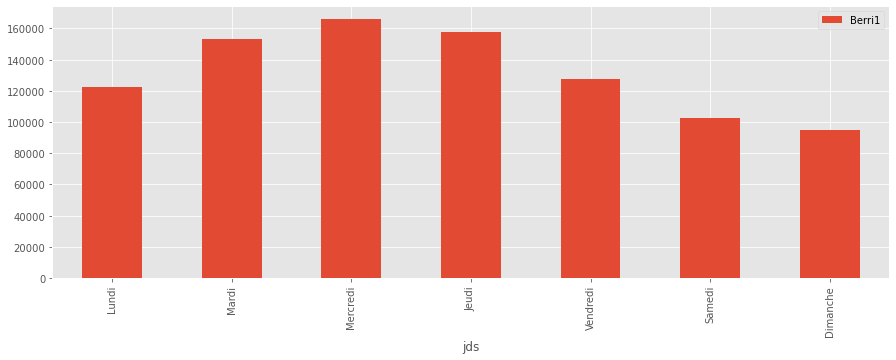

In [ ]:
#TBD

a.plot(kind="bar")

On dirait que les habitants de Montréal sont des cyclistes de banlieue - ils font beaucoup plus de vélo pendant la semaine.

### Synthese

-6-

Vous pouvez faire une petite synthese de ce debut de notebook en reprenant les lignes de codes nécessaires à la réalisation de cette visualisation.

Peut être, au lieu de prendre la somme de tous les utilisateurs de chaque jours, prenez le max d'utilisateur par jour

In [ ]:


def data_handling(path):
    # Charger le fichier
    df = pd.read_csv(path, sep=',', header=0, index_col='Date', parse_dates=True,dayfirst=True)
    # creer un jds dans le df
    df['jds']=df.index.weekday
    a=df[['Berri1',"jds"]]
    a=a.groupby("jds").sum()
    d={0:'Lundi',1:'Mardi',2:"Mercredi",3:'Jeudi',4:"Vendredi",5:"Samedi",6:"Dimanche"}
    a.index=a.index.map(d)
    # Grouper par jds sur la colonne berri1 (une somme)

    # Mapper l'index de mon groupby par "d

    return a
    

In [ ]:
data_handling('comptagevelo2017.csv')

,Berri1
jds,
Lundi,122291
Mardi,153303
Mercredi,165956
Jeudi,157685
Vendredi,127579
Samedi,102816
Dimanche,94869


# Un peu de météo d'amerique du Nord

À la fin de ce chapitre, toutes les données météorologiques du Canada pour 2012 seront téléchargées et sauvegardées dans un fichier CSV.

Nous le ferons en téléchargeant ces données mois par mois, pour ensuite les regrouper.


### Téléchargement d'un mois de données météorologiques 

Après s'etre amusé avec les données de cyclisme, nous pourrions prendre des données de température et de précipitations pour savoir si les gens aiment faire du vélo quand le temps est maussade. 

Nous allons donc consulter les données météorologiques historiques du Canada et comprendre comment les obtenir automatiquement.

Ici, nous allons obtenir les données pour mars 2012 et les nettoyer.

Voici un modèle d'URL que vous pouvez utiliser pour obtenir des données à Montréal.

In [1]:
# J'impose deux variables dans cette adresse : l'annee et le mois
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"
url = url_template.format(month=3, year=2012)
print(url)

http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year=2012&Month=3&timeframe=1&submit=Download+Data


In [6]:
# Pour obtenir les données de mars 2012, nous devons les formater avec month=3, year=2012.

weather_mar2012=pd.read_csv(url, index_col='Date/Time (LST)', parse_dates=True)
weather_mar2012

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time (LST),,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,00:00,-5.5,NaN,...,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,01:00,-5.7,NaN,...,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,02:00,-5.4,NaN,...,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,03:00,-4.7,NaN,...,NaN,4.0,NaN,100.69,NaN,NaN,NaN,-12.0,NaN,Snow
2012-03-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,04:00,-5.4,NaN,...,NaN,1.6,NaN,100.62,NaN,NaN,NaN,-14.0,NaN,Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-03-31 19:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,19:00,5.9,NaN,...,NaN,25.0,NaN,100.88,NaN,NaN,NaN,NaN,NaN,Clear
2012-03-31 20:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,20:00,4.4,NaN,...,NaN,25.0,NaN,100.85,NaN,NaN,NaN,NaN,NaN,Clear
2012-03-31 21:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,21:00,2.6,NaN,...,NaN,25.0,NaN,100.86,NaN,NaN,NaN,NaN,NaN,Clear


C'est Top! 

Nous pouvons utiliser la fonction read_csv et lui donner une URL en tant que nom de fichier.

Il existe plusieurs "skiprows options". Nous analysons également les dates et définissons 'Date / Time' comme colonne d'index. Voici le dataframe résultant.

-7-

Plottez moi la Température ! 
 
 nb: uniquement la température ou sinon plottez le pandas :)

<AxesSubplot:xlabel='Date/Time (LST)'>

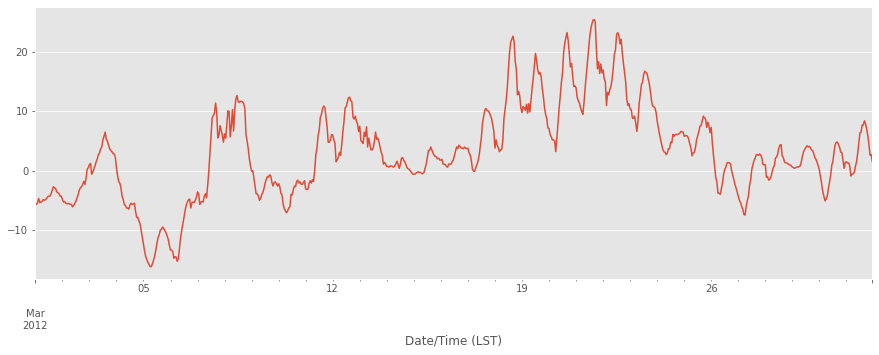

In [ ]:
#TBD
weather_mar2012['Temp (°C)'].plot()


Remarquez comment dans un meme mois il peut faire fait 25 ° C et d'autre fois -15°C !

-8-

Vous remarquerez ci-dessus que quelques colonnes sont soit entièrement vides, soit ne contiennent que quelques valeurs. Débarrassons-nous de ça avec dropna.

L'argument axis=1 à dropna signifie "supprime les colonnes" (pas les lignes), et how='any'signifie" supprime la colonne si une valeur est nulle ".


In [7]:
#TBD

weather_mar2012.dropna(axis=1,how="any",inplace=True)


### Tracer la température par heure de la journée

-9-

Celui-ci est juste pour le plaisir - nous l'avons déjà fait auparavant, en utilisant groupby !

Mais faisons-le quand même.

A vous de jouer

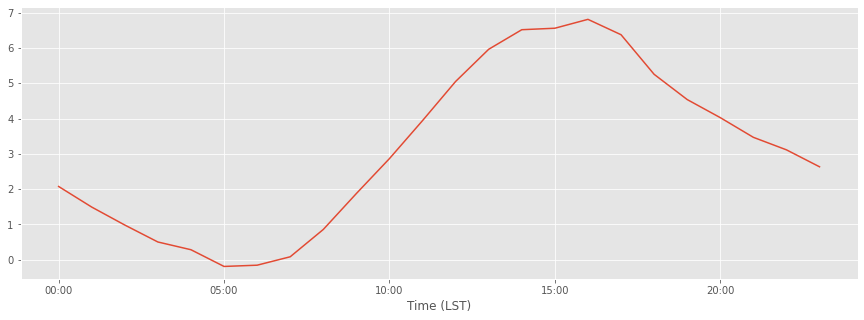

In [8]:
#TBD

weather_mar2012.groupby(["Time (LST)"])["Temp (°C)"].mean().plot()

### Obtenir les données de toute l'année

-10-

Alors, si nous voulons les données pour toute l'année ? Idéalement, l'API nous permettrait simplement de télécharger ce fichier.

Premièrement, plaçons nos instructions permettant de recuperer ces informations dans une fonction qui obtient la météo pour un mois donné.

Allez y

In [ ]:
def download_weather_month(years, months):
    url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"
    url = url_template.format(month=months, year=years)
    weather_data=pd.read_csv(url, index_col='Date/Time (LST)', parse_dates=True)    
    return weather_data

In [ ]:
download_weather_month(2012,10)

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time (LST),,,,,,,,,,,,,,,,,,,,,
2012-10-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,10,1,00:00,11.5,NaN,...,NaN,19.3,NaN,99.62,NaN,NaN,NaN,NaN,NaN,Rain
2012-10-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,10,1,01:00,11.4,NaN,...,NaN,6.4,NaN,99.56,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
2012-10-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,10,1,02:00,11.3,NaN,...,NaN,6.4,NaN,99.50,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
2012-10-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,10,1,03:00,11.2,NaN,...,NaN,8.0,NaN,99.44,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
2012-10-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,10,1,04:00,11.3,NaN,...,NaN,6.4,NaN,99.44,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-31 19:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,10,31,19:00,8.5,NaN,...,NaN,25.0,NaN,99.37,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy
2012-10-31 20:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,10,31,20:00,8.4,NaN,...,NaN,25.0,NaN,99.40,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy
2012-10-31 21:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,10,31,21:00,8.1,NaN,...,NaN,25.0,NaN,99.39,NaN,NaN,NaN,NaN,NaN,Rain Showers


In [ ]:
weather_mar2012.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Year',
       'Month', 'Day', 'Time (LST)', 'Temp (°C)', 'Dew Point Temp (°C)',
       'Rel Hum (%)', 'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)',
       'Weather'],
      dtype='object')

-11-

Pouvez vous creer une liste dont les élements sont les données (dataframe) meteo mensuelles de l'année 2012. La longeur de cette liste ne pourra exceder 12.

In [9]:
list(range(1,15))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
l=[]

for mois in range(1,13):
    #print(mois)
    l.append(download_weather_month(2012,mois))

#TBD

In [ ]:
l[11]

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time (LST),,,,,,,,,,,,,,,,,,,,,
2012-12-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,00:00,-10.8,NaN,...,NaN,25.0,NaN,103.26,NaN,NaN,NaN,-16.0,NaN,Clear
2012-12-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,01:00,-11.0,NaN,...,NaN,25.0,NaN,103.25,NaN,NaN,NaN,-17.0,NaN,Mainly Clear
2012-12-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,02:00,-11.1,NaN,...,NaN,25.0,NaN,103.21,NaN,NaN,NaN,-19.0,NaN,Mainly Clear
2012-12-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,03:00,-12.5,NaN,...,NaN,25.0,NaN,103.27,NaN,NaN,NaN,-20.0,NaN,Mainly Clear
2012-12-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,04:00,-11.8,NaN,...,NaN,25.0,NaN,103.22,NaN,NaN,NaN,-19.0,NaN,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,31,19:00,0.1,NaN,...,NaN,9.7,NaN,100.13,NaN,NaN,NaN,NaN,NaN,Snow
2012-12-31 20:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,31,20:00,0.2,NaN,...,NaN,9.7,NaN,100.03,NaN,NaN,NaN,NaN,NaN,Snow
2012-12-31 21:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,31,21:00,-0.5,NaN,...,NaN,4.8,NaN,99.95,NaN,NaN,NaN,-7.0,NaN,Snow


Une fois que nous avons cela, il est facile de concaténer tous les dataframes en un seul et meme datframe avec  pd.concat  
Et maintenant nous avons les données sur l'année entière!

In [ ]:
weather_2012 = pd.concat(l)
weather_2012

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time (LST),,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,00:00,-1.8,NaN,...,NaN,8.0,NaN,101.24,NaN,NaN,NaN,-3.0,NaN,Fog
2012-01-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,01:00,-1.8,NaN,...,NaN,8.0,NaN,101.24,NaN,NaN,NaN,-3.0,NaN,Fog
2012-01-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,02:00,-1.8,NaN,...,NaN,4.0,NaN,101.26,NaN,NaN,NaN,-4.0,NaN,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,03:00,-1.5,NaN,...,NaN,4.0,NaN,101.27,NaN,NaN,NaN,-4.0,NaN,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,1,1,04:00,-1.5,NaN,...,NaN,4.8,NaN,101.23,NaN,NaN,NaN,-4.0,NaN,Fog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,31,19:00,0.1,NaN,...,NaN,9.7,NaN,100.13,NaN,NaN,NaN,NaN,NaN,Snow
2012-12-31 20:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,31,20:00,0.2,NaN,...,NaN,9.7,NaN,100.03,NaN,NaN,NaN,NaN,NaN,Snow
2012-12-31 21:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,31,21:00,-0.5,NaN,...,NaN,4.8,NaN,99.95,NaN,NaN,NaN,-7.0,NaN,Snow


### Saving to a CSV

-13-

Il est lent et inutile de télécharger les données à chaque fois, alors sauvegardons notre dataframe pour une utilisation ultérieure!

In [ ]:
weather_2012.to_csv('Meteo_2021_Montreal.csv')

#### Voilà c'etait votre premier scrap. Bienvenu chez les hackers qui se servent là ou ils peuvent :)

-14-

Avant de partir, vous pouvez me scrapper les données meteo de Montréal pour l'année 2018